### Importing Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 

from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
raw_data = pd.read_excel('Admission.xlsx')
raw_data.head()

,admit,gre,gpa,ses,Gender_Male,Race,rank
0,0,380,3.61,1,0,3,3
1,1,660,3.67,2,0,2,3
2,1,800,4.00,2,0,2,1
3,1,640,3.19,1,1,2,4
4,0,520,2.93,3,1,2,4


In [3]:
data = raw_data.copy()

In [4]:
s = pd.to_numeric(data['ses'], errors='coerce')
m1 = (s == 1)
m2 = (s == 2)
m3 = (s == 3)
masks = [m1,m2,m3]
vals = ['low','medium','high']
data['new_ses'] = np.select(masks, vals, default=1)
print(data)

     admit  gre   gpa  ses  Gender_Male  Race  rank new_ses
0        0  380  3.61    1            0     3     3     low
1        1  660  3.67    2            0     2     3  medium
2        1  800  4.00    2            0     2     1  medium
3        1  640  3.19    1            1     2     4     low
4        0  520  2.93    3            1     2     4    high
..     ...  ...   ...  ...          ...   ...   ...     ...
395      0  620  4.00    2            0     2     2  medium
396      0  560  3.04    2            0     1     3  medium
397      0  460  2.63    3            0     2     2    high
398      0  700  3.65    1            1     1     2     low
399      0  600  3.89    2            1     3     3  medium

[400 rows x 8 columns]


In [5]:
s1 = pd.to_numeric(data['Race'], errors='coerce')
n1 = (s1 == 1)
n2 = (s1 == 2)
n3 = (s1 == 3)
masks = [n1,n2,n3]
vals = ['Hispanic','Asian','African-American']
data['new_race'] = np.select(masks, vals, default=1)
print(data)

     admit  gre   gpa  ses  Gender_Male  Race  rank new_ses          new_race
0        0  380  3.61    1            0     3     3     low  African-American
1        1  660  3.67    2            0     2     3  medium             Asian
2        1  800  4.00    2            0     2     1  medium             Asian
3        1  640  3.19    1            1     2     4     low             Asian
4        0  520  2.93    3            1     2     4    high             Asian
..     ...  ...   ...  ...          ...   ...   ...     ...               ...
395      0  620  4.00    2            0     2     2  medium             Asian
396      0  560  3.04    2            0     1     3  medium          Hispanic
397      0  460  2.63    3            0     2     2    high             Asian
398      0  700  3.65    1            1     1     2     low          Hispanic
399      0  600  3.89    2            1     3     3  medium  African-American

[400 rows x 9 columns]


In [6]:
s2 = pd.to_numeric(data['rank'], errors='coerce')
k1 = (s2 == 1)
k2 = (s2 == 2)
k3 = (s2 == 3)
k4 = (s2 == 4)
masks = [k1,k2,k3,k4]
vals = ['1','2','3','4']
data['new_rank'] = np.select(masks, vals, default=1)
print(data)

     admit  gre   gpa  ses  Gender_Male  Race  rank new_ses          new_race  \
0        0  380  3.61    1            0     3     3     low  African-American   
1        1  660  3.67    2            0     2     3  medium             Asian   
2        1  800  4.00    2            0     2     1  medium             Asian   
3        1  640  3.19    1            1     2     4     low             Asian   
4        0  520  2.93    3            1     2     4    high             Asian   
..     ...  ...   ...  ...          ...   ...   ...     ...               ...   
395      0  620  4.00    2            0     2     2  medium             Asian   
396      0  560  3.04    2            0     1     3  medium          Hispanic   
397      0  460  2.63    3            0     2     2    high             Asian   
398      0  700  3.65    1            1     1     2     low          Hispanic   
399      0  600  3.89    2            1     3     3  medium  African-American   

    new_rank  
0          3

In [7]:
s3 = pd.to_numeric(data['Gender_Male'], errors='coerce')
j1 = (s3 == 0)
j2 = (s3 == 1)
masks = [j1,j2]
vals = ['Female','Male']
data['gender'] = np.select(masks, vals, default=1)
print(data)

     admit  gre   gpa  ses  Gender_Male  Race  rank new_ses          new_race  \
0        0  380  3.61    1            0     3     3     low  African-American   
1        1  660  3.67    2            0     2     3  medium             Asian   
2        1  800  4.00    2            0     2     1  medium             Asian   
3        1  640  3.19    1            1     2     4     low             Asian   
4        0  520  2.93    3            1     2     4    high             Asian   
..     ...  ...   ...  ...          ...   ...   ...     ...               ...   
395      0  620  4.00    2            0     2     2  medium             Asian   
396      0  560  3.04    2            0     1     3  medium          Hispanic   
397      0  460  2.63    3            0     2     2    high             Asian   
398      0  700  3.65    1            1     1     2     low          Hispanic   
399      0  600  3.89    2            1     3     3  medium  African-American   

    new_rank  gender  
0   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   admit        400 non-null    int64  
 1   gre          400 non-null    int64  
 2   gpa          400 non-null    float64
 3   ses          400 non-null    int64  
 4   Gender_Male  400 non-null    int64  
 5   Race         400 non-null    int64  
 6   rank         400 non-null    int64  
 7   new_ses      400 non-null    object 
 8   new_race     400 non-null    object 
 9   new_rank     400 non-null    object 
 10  gender       400 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [9]:
data.drop(['ses','Race','rank','Gender_Male'], axis=1, inplace=True)

In [10]:
data.head()

,admit,gre,gpa,new_ses,new_race,new_rank,gender
0,0,380,3.61,low,African-American,3,Female
1,1,660,3.67,medium,Asian,3,Female
2,1,800,4.00,medium,Asian,1,Female
3,1,640,3.19,low,Asian,4,Male
4,0,520,2.93,high,Asian,4,Male


### Exploratory Data Analysis

In [11]:
data.corr()

,admit,gre,gpa
admit,1.000000,0.184434,0.178212
gre,0.184434,1.000000,0.384266
gpa,0.178212,0.384266,1.000000


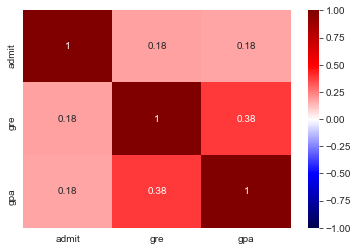

In [12]:
sns.heatmap(data.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

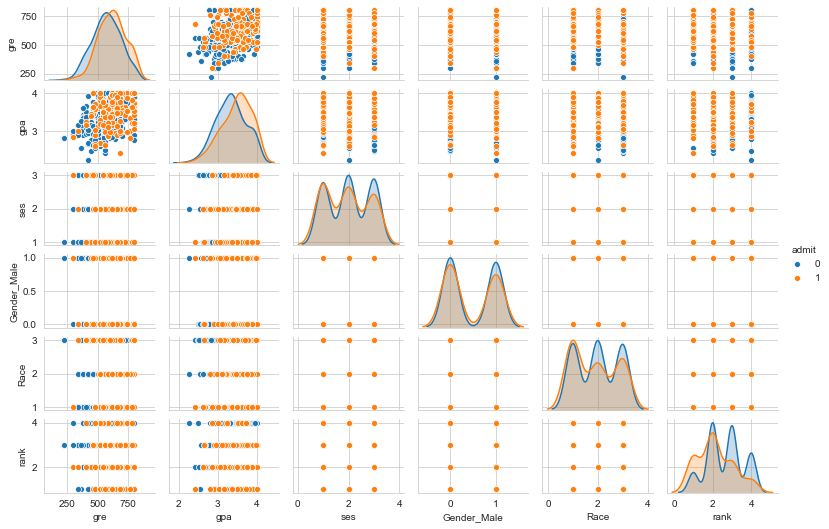

In [13]:
sns.pairplot(raw_data, hue='admit', height=1.2, aspect=1.5);

In [14]:
# Since there is colinearity between gre and gpa, therefore gpa will be dropped.
data_no_corr = data.copy()

In [15]:
data_no_corr.drop(['gpa'], axis=1, inplace=True)

In [16]:
data_no_corr.head()

,admit,gre,new_ses,new_race,new_rank,gender
0,0,380,low,African-American,3,Female
1,1,660,medium,Asian,3,Female
2,1,800,medium,Asian,1,Female
3,1,640,low,Asian,4,Male
4,0,520,high,Asian,4,Male


In [17]:
data_no_corr.describe(include='all')

,admit,gre,new_ses,new_race,new_rank,gender
count,400.000000,400.000000,400,400,400,400
unique,NaN,NaN,3,3,4,2
top,NaN,NaN,medium,Hispanic,2,Female
freq,NaN,NaN,139,143,151,210
mean,0.317500,587.700000,NaN,NaN,NaN,NaN
std,0.466087,115.516536,NaN,NaN,NaN,NaN
min,0.000000,220.000000,NaN,NaN,NaN,NaN
25%,0.000000,520.000000,NaN,NaN,NaN,NaN
50%,0.000000,580.000000,NaN,NaN,NaN,NaN
75%,1.000000,660.000000,NaN,NaN,NaN,NaN


In [18]:
# Frequency of admit
admit = data_no_corr['admit'].sum() 
not_admit = len(data_no_corr['admit']) - admit

# Percentage of admit
admit_perc = round(admit/len(data_no_corr['admit']) * 100, 1)
not_admit_perc = round(not_admit/len(data_no_corr['admit']) * 100, 1)

print("Admit: {}".format(admit) + ', ' + "Admit %: {}".format(admit_perc))
print("Not admit: {}".format(not_admit) + ', ' + "Not admit %: {}".format(not_admit_perc))

Admit: 127, Admit %: 31.8
Not admit: 273, Not admit %: 68.2


Text(0.75, 10, 'Admit: 31.8%')

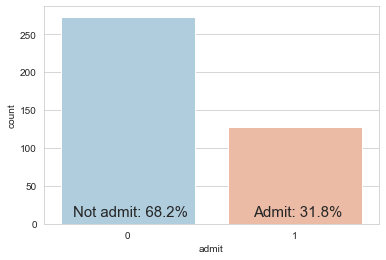

In [19]:
sns.countplot(x='admit',data=data_no_corr,palette='RdBu_r')

plt.annotate('Not admit: {}%'.format(not_admit_perc), xy=(-0.33, 10),size=15)
plt.annotate('Admit: {}%'.format(admit_perc), xy=(0.75, 10),size=15)

<AxesSubplot:xlabel='admit', ylabel='count'>

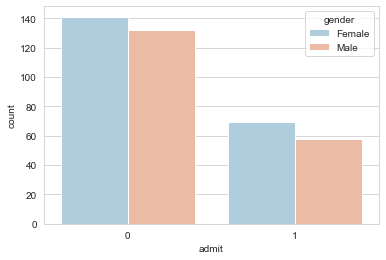

In [20]:
sns.countplot(x='admit',hue='gender',data=data_no_corr,palette='RdBu_r')

<AxesSubplot:xlabel='admit', ylabel='count'>

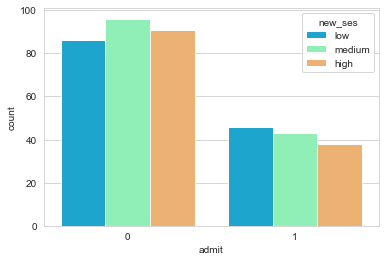

In [21]:
sns.countplot(x='admit',hue='new_ses',data=data_no_corr,palette='rainbow')

<AxesSubplot:xlabel='admit', ylabel='count'>

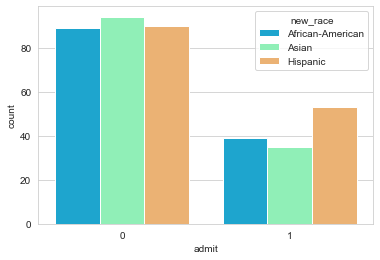

In [22]:
sns.countplot(x='admit',hue='new_race',data=data_no_corr,palette='rainbow')

<AxesSubplot:xlabel='admit', ylabel='count'>

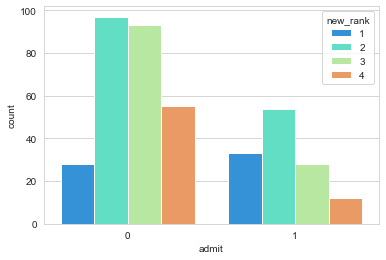

In [23]:
sns.countplot(x='admit',hue='new_rank',data=data_no_corr,palette='rainbow')

<AxesSubplot:xlabel='gre'>

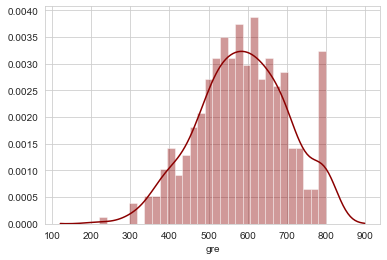

In [24]:
sns.distplot(data_no_corr['gre'],kde=True,color='darkred',bins=30)

In [25]:
# Create dummy variables
data_with_dummy = pd.get_dummies(data_no_corr, drop_first = True)
data_with_dummy.head()

,admit,gre,new_ses_low,new_ses_medium,new_race_Asian,new_race_Hispanic,new_rank_2,new_rank_3,new_rank_4,gender_Male
0,0,380,1,0,0,0,0,1,0,0
1,1,660,0,1,1,0,0,1,0,0
2,1,800,0,1,1,0,0,0,0,0
3,1,640,1,0,1,0,0,0,1,1
4,0,520,0,0,1,0,0,0,1,1


### Feature Selection

In [26]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [28]:
## Scale the data 
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

In [29]:
# Feature Selection
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(X_train_scaled, y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [30]:
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [31]:
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat

Index(['gre', 'new_ses_low', 'new_ses_medium', 'new_race_Asian',
       'new_race_Hispanic', 'new_rank_2', 'new_rank_3', 'new_rank_4',
       'gender_Male'],
      dtype='object')

### Cross Validation

In [32]:
def cross_val(model, X, y, n_splits, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
    cv = KFold(n_splits=n_splits, shuffle=True, random_state=365) 
    
    accuracy     = np.mean(cross_val_score(model, X_train, y_train,cv=cv, scoring='accuracy'))
    precision    = np.mean(cross_val_score(model, X_train, y_train,cv=cv, scoring='precision'))
    recall       = np.mean(cross_val_score(model, X_train, y_train,cv=cv, scoring='recall'))
    f1score      = np.mean(cross_val_score(model, X_train, y_train,cv=cv, scoring='f1'))
    rocauc       = np.mean(cross_val_score(model, X_train, y_train,cv=cv, scoring='roc_auc'))
    
    df_model = pd.DataFrame({'model'        : [name],
                             'accuracy'     : [accuracy],
                             'precision'    : [precision],
                             'recall'       : [recall],
                             'f1score'      : [f1score],
                             'rocauc'       : [rocauc]})
    return df_model

In [33]:
from sklearn import svm

gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = svm.SVC()

X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

## Scale the data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors 
X_scaled = std.transform(X.values)

# to concat all models
df_models = pd.concat([cross_val(gnb, X_scaled, y, 5, 'GaussianNB'),
                       cross_val(logit, X_scaled, y, 5, 'LogisticRegression'),
                       cross_val(knn, X_scaled, y, 5, 'KNN'),
                       cross_val(decisiontree, X_scaled, y, 5, 'DecisionTree'),
                       cross_val(randomforest, X_scaled, y, 5, 'RandomForest'),
                       cross_val(svm, X_scaled, y, 5, 'SVC')
                       ], axis=0).reset_index()

df_models_scale = df_models.drop('index', axis=1)
df_models_scale

,model,accuracy,precision,recall,f1score,rocauc
0,GaussianNB,0.643750,0.424542,0.389685,0.403315,0.631554
1,LogisticRegression,0.700000,0.582308,0.223502,0.307467,0.642819
2,KNN,0.593750,0.295495,0.192397,0.230767,0.569200
3,DecisionTree,0.590625,0.376162,0.324444,0.325671,0.543785
4,RandomForest,0.621875,0.352381,0.214050,0.285248,0.571242
5,SVC,0.675000,0.352381,0.080496,0.123030,0.601866


In [34]:
# Model Selection
# From the cross-validation, GaussianNB has the highest F1 score. 
# Therefore, will further evaluate this model.

### Model Evaluation (after cross validation)

#### GaussianNB (with scaled data)

In [35]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [37]:
## Scale the data 
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

In [38]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [39]:
y_predict = gnb.predict(X_test_scaled)

print('Accuracy Score for GaussianNB: {}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score for GaussianNB: {}'.format(precision_score(y_test, y_predict)))
print('Recall Score for GaussianNB: {}\n'.format(recall_score(y_test, y_predict)))

print('Classification report for GaussianNB:\n {}'.format(classification_report(y_test, y_predict)))
print('Confusion Matrix for GaussianNB:\n {}'.format(confusion_matrix(y_test, y_predict)))

Accuracy Score for GaussianNB: 0.6125
Precision Score for GaussianNB: 0.4
Recall Score for GaussianNB: 0.38461538461538464

Classification report for GaussianNB:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72        54
           1       0.40      0.38      0.39        26

    accuracy                           0.61        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.61      0.61      0.61        80

Confusion Matrix for GaussianNB:
 [[39 15]
 [16 10]]


### Validation using GridSearchCV

#### SVM

In [40]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

## Scale the data 
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, scoring=scoring, refit='f1', return_train_score=True)
clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}, refit='f1',
             return_train_score=True,
             scoring=['accuracy', 'f1', 'precision', 'recall', 'roc_auc'])

In [41]:
#print("Best parameters from gridsearch: {}".format(gridsearch.best_params_))
#print("CV score=%0.3f" % gridsearch.best_score_)
print("Best estimator: {}".format(clf.best_estimator_))
print("Best score: {}".format(clf.best_score_))
print("Best parameter: {}".format(clf.best_params_))
print("Best index: {}".format(clf.best_index_))      

Best estimator: SVC(C=10)
Best score: 0.3363594363594364
Best parameter: {'C': 10, 'kernel': 'rbf'}
Best index: 3


In [42]:
def gs_svm(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.1, 1, 10]}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        svc = svm.SVC()
        clf = GridSearchCV(svc, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_svm_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                      'Best metric': [score],
                                      'Best score': [best_score],
                                      'Best parameter': [best_parameter]})
    return gs_svm_metric

In [43]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_svm(X, y, 'accuracy'),
                        gs_svm(X, y, 'f1'),
                        gs_svm(X, y, 'precision'),
                        gs_svm(X, y, 'recall'),
                        gs_svm(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_gs_svm_metric = df_metrics.drop('index', axis=1)
df_gs_svm_metric

,Best estimator,Best metric,Best score,Best parameter
0,"SVC(C=0.01, kernel='linear')",accuracy,0.684375,"{'C': 0.01, 'kernel': 'linear'}"
1,SVC(C=10),f1,0.3445467392526216,"{'C': 10, 'kernel': 'rbf'}"
2,"SVC(C=1, kernel='linear')",precision,0.40519480519480516,"{'C': 1, 'kernel': 'linear'}"
3,SVC(C=10),recall,0.30761904761904757,"{'C': 10, 'kernel': 'rbf'}"
4,"SVC(C=1, kernel='linear')",roc_auc,0.6003503473270916,"{'C': 1, 'kernel': 'linear'}"


#### Logistic Regression

In [44]:
def gs_log(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {'penalty':('l1', 'l2'), 'C':[0.01, 0.1, 1, 10, 100, 1000]}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        log_reg = LogisticRegression()
        clf = GridSearchCV(log_reg, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_log_reg_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                          'Best metric': [score],
                                          'Best score': [best_score],
                                          'Best parameter': [best_parameter]})
    return gs_log_reg_metric

In [45]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_log(X, y, 'accuracy'),
                        gs_log(X, y, 'f1'),
                        gs_log(X, y, 'precision'),
                        gs_log(X, y, 'recall'),
                        gs_log(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_gs_log_metric = df_metrics.drop('index', axis=1)
df_gs_log_metric

,Best estimator,Best metric,Best score,Best parameter
0,LogisticRegression(C=0.1),accuracy,0.7,"{'C': 0.1, 'penalty': 'l2'}"
1,LogisticRegression(C=100),f1,0.2896613756613757,"{'C': 100, 'penalty': 'l2'}"
2,LogisticRegression(C=0.1),precision,0.7166666666666666,"{'C': 0.1, 'penalty': 'l2'}"
3,LogisticRegression(C=100),recall,0.2061904761904762,"{'C': 100, 'penalty': 'l2'}"
4,LogisticRegression(C=100),roc_auc,0.6549481526225712,"{'C': 100, 'penalty': 'l2'}"


#### GaussianNB

In [46]:
def gs_gnb(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        gnb = GaussianNB()
        clf = GridSearchCV(gnb, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_gnb_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                          'Best metric': [score],
                                          'Best score': [best_score],
                                          'Best parameter': [best_parameter]})
    return gs_gnb_metric

In [47]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_gnb(X, y, 'accuracy'),
                        gs_gnb(X, y, 'f1'),
                        gs_gnb(X, y, 'precision'),
                        gs_gnb(X, y, 'recall'),
                        gs_gnb(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_gs_gnb_metric = df_metrics.drop('index', axis=1)
df_gs_gnb_metric

,Best estimator,Best metric,Best score,Best parameter
0,GaussianNB(),accuracy,0.640625,{}
1,GaussianNB(),f1,0.390956937799043,{}
2,GaussianNB(),precision,0.41535302861389817,{}
3,GaussianNB(),recall,0.37476190476190474,{}
4,GaussianNB(),roc_auc,0.6216490486257926,{}


#### KNN

In [48]:
def gs_knn(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {'n_neighbors':[3, 5, 7, 9, 11]}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        knn = KNeighborsClassifier()
        clf = GridSearchCV(knn, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_knn_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                          'Best metric': [score],
                                          'Best score': [best_score],
                                          'Best parameter': [best_parameter]})
    return gs_knn_metric

In [49]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_knn(X, y, 'accuracy'),
                        gs_knn(X, y, 'f1'),
                        gs_knn(X, y, 'precision'),
                        gs_knn(X, y, 'recall'),
                        gs_knn(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_knn_metric = df_metrics.drop('index', axis=1)
df_knn_metric

,Best estimator,Best metric,Best score,Best parameter
0,KNeighborsClassifier(n_neighbors=9),accuracy,0.653125,{'n_neighbors': 9}
1,KNeighborsClassifier(n_neighbors=3),f1,0.3396717171717172,{'n_neighbors': 3}
2,KNeighborsClassifier(n_neighbors=3),precision,0.38993528401423133,{'n_neighbors': 3}
3,KNeighborsClassifier(n_neighbors=3),recall,0.3071428571428571,{'n_neighbors': 3}
4,KNeighborsClassifier(n_neighbors=11),roc_auc,0.6017951525218967,{'n_neighbors': 11}


#### DecisionTree

In [50]:
def gs_dec_tree(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {'max_depth':[3, 4, 5, 6]}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        dec_tree = DecisionTreeClassifier()
        clf = GridSearchCV(dec_tree, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_dec_tree_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                           'Best metric': [score],
                                           'Best score': [best_score],
                                           'Best parameter': [best_parameter]})
    return gs_dec_tree_metric

In [51]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_dec_tree(X, y, 'accuracy'),
                        gs_dec_tree(X, y, 'f1'),
                        gs_dec_tree(X, y, 'precision'),
                        gs_dec_tree(X, y, 'recall'),
                        gs_dec_tree(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_dec_tree_metric = df_metrics.drop('index', axis=1)
df_dec_tree_metric

,Best estimator,Best metric,Best score,Best parameter
0,DecisionTreeClassifier(max_depth=4),accuracy,0.66875,{'max_depth': 4}
1,DecisionTreeClassifier(max_depth=6),f1,0.30201423097974817,{'max_depth': 6}
2,DecisionTreeClassifier(max_depth=4),precision,0.42777777777777776,{'max_depth': 4}
3,DecisionTreeClassifier(max_depth=6),recall,0.2852380952380952,{'max_depth': 6}
4,DecisionTreeClassifier(max_depth=6),roc_auc,0.5986994110540622,{'max_depth': 6}


#### RandomForest

In [52]:
def gs_ran_forest(X, y, score):
    if score == score:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)
    
        parameters = {'n_estimators':[100, 200, 300, 400]}
        scoring= ['accuracy', 'f1', 'precision','recall','roc_auc']
        ran_forest = RandomForestClassifier()
        clf = GridSearchCV(ran_forest, parameters, scoring=scoring, refit=score, return_train_score=True)
        clf.fit(X_train, y_train)
    
        best_estimator = np.array(clf.best_estimator_)
        best_score = np.array(clf.best_score_)
        best_parameter = np.array(clf.best_params_)
    
        gs_ran_forest_metric = pd.DataFrame({'Best estimator': [best_estimator],
                                           'Best metric': [score],
                                           'Best score': [best_score],
                                           'Best parameter': [best_parameter]})
    return gs_ran_forest_metric

In [53]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all metrics
df_metrics = pd.concat([gs_ran_forest(X, y, 'accuracy'),
                        gs_ran_forest(X, y, 'f1'),
                        gs_ran_forest(X, y, 'precision'),
                        gs_ran_forest(X, y, 'recall'),
                        gs_ran_forest(X, y, 'roc_auc')
                       ], axis=0).reset_index()

df_ran_forest_metric = df_metrics.drop('index', axis=1)
df_ran_forest_metric

,Best estimator,Best metric,Best score,Best parameter
0,"[DecisionTreeClassifier(max_features='auto', r...",accuracy,0.6375,{'n_estimators': 300}
1,"[DecisionTreeClassifier(max_features='auto', r...",f1,0.29950662083015017,{'n_estimators': 300}
2,"[DecisionTreeClassifier(max_features='auto', r...",precision,0.4146520146520146,{'n_estimators': 300}
3,"[DecisionTreeClassifier(max_features='auto', r...",recall,0.2671428571428572,{'n_estimators': 300}
4,"[DecisionTreeClassifier(max_features='auto', r...",roc_auc,0.5907354273633344,{'n_estimators': 100}


#### Training, Validating and Scoring All Models (Simple Validation OverSampling with scaling)

In [54]:
def sv_oversampling(model, X, y, name):
    global accuracy, precision, recall, f1score, rocauc, d, df_model
    from imblearn.over_sampling import RandomOverSampler
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)
    
    if model == model:
            
        # Creating the OverSampled data
        X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_resampled, y_resampled) 
        y_pred = clf_model.predict(X_val)
        
        # Save scores of model
        accuracy = np.array(accuracy_score(y_val, y_pred))
        precision = np.array(precision_score(y_val, y_pred))
        recall = np.array(recall_score(y_val, y_pred))
        f1score = np.array(f1_score(y_val, y_pred))   
        rocauc = np.array(roc_auc_score(y_val, y_pred))
        
    
        d = {'model': [name],
             'accuracy': [accuracy],
             'precision': [precision],
             'recall': [recall],
             'f1score': [f1score],
             'rocauc': [rocauc]}
        
    df_model = pd.DataFrame(d)
    return df_model
   

In [55]:
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([sv_oversampling(gnb, X, y, 'GaussianNB'),
                       sv_oversampling(logit, X, y, 'LogisticRegression'),
                       sv_oversampling(knn, X, y, 'KNN'),
                       sv_oversampling(decisiontree, X, y, 'DecisionTree'),
                       sv_oversampling(randomforest, X, y, 'RandomForest'),
                       sv_oversampling(linearsvc, X, y, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_oversample = df_models.drop('index', axis=1)
df_models_scale_oversample

,model,accuracy,precision,recall,f1score,rocauc
0,GaussianNB,0.4375,0.20512820512820512,0.36363636363636365,0.2622950819672131,0.41457680250783707
1,LogisticRegression,0.55,0.26666666666666666,0.36363636363636365,0.30769230769230765,0.49216300940438873
2,KNN,0.4875,0.22857142857142856,0.36363636363636365,0.2807017543859649,0.44905956112852674
3,DecisionTree,0.625,0.3,0.2727272727272727,0.28571428571428564,0.5156739811912225
4,RandomForest,0.575,0.22727272727272727,0.22727272727272727,0.22727272727272727,0.4670846394984326
5,LinearSVC,0.525,0.25,0.36363636363636365,0.2962962962962963,0.474921630094044


### Simple validation Random Oversampling with scaling

#### GaussianNB

In [56]:
from imblearn.over_sampling import RandomOverSampler

X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)

# Creating the OverSampled data
X_resampled, y_resampled = RandomOverSampler(random_state=42).fit_sample(X_train, y_train)

# Initializing model
clf_ros_gnb = GaussianNB().fit(X_resampled, y_resampled) 
y_pred = clf_ros_gnb.predict(X_val)

# Save scores of model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)   
rocauc = roc_auc_score(y_val, y_pred)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 score: {}'.format(f1score))
print('ROC AUC: {}'.format(rocauc))

Accuracy: 0.4375
Precision: 0.20512820512820512
Recall: 0.36363636363636365
F1 score: 0.2622950819672131
ROC AUC: 0.41457680250783707


#### Logistic Regression

In [57]:
# Initializing model
clf_ros_log = LogisticRegression().fit(X_resampled, y_resampled) 
y_pred = clf_ros_log.predict(X_val)

# Save scores of model
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1score = f1_score(y_val, y_pred)   
rocauc = roc_auc_score(y_val, y_pred)

print('Accuracy: {}'.format(accuracy))
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('F1 score: {}'.format(f1score))
print('ROC AUC: {}'.format(rocauc))

Accuracy: 0.55
Precision: 0.26666666666666666
Recall: 0.36363636363636365
F1 score: 0.30769230769230765
ROC AUC: 0.49216300940438873


#### Training, Validating and Scoring All Models (Simple Validation SMOTE with scaling)

In [58]:
def sv_smote(model, X, y, name):
    global accuracy, precision, recall, f1score, rocauc, d, df_model
    from imblearn.over_sampling import SMOTE
    
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=10)
    
    if model == model:
            
        # Creating the SMOTE data
        X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X_train, y_train)
        
        # Initializing model
        clf_model = model.fit(X_smoted, y_smoted) 
        y_pred = clf_model.predict(X_val)
        
        # Save scores of model
        accuracy = np.array(accuracy_score(y_val, y_pred))
        precision = np.array(precision_score(y_val, y_pred))
        recall = np.array(recall_score(y_val, y_pred))
        f1score = np.array(f1_score(y_val, y_pred))   
        rocauc = np.array(roc_auc_score(y_val, y_pred))
        
    
        d = {'model': [name],
             'accuracy': [accuracy],
             'precision': [precision],
             'recall': [recall],
             'f1score': [f1score],
             'rocauc': [rocauc]}
        
    df_model = pd.DataFrame(d)
    return df_model
   

In [59]:
gnb = GaussianNB()
logit = LogisticRegression()
knn = KNeighborsClassifier()
decisiontree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
linearsvc = LinearSVC()

X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

# Scale the data
std = StandardScaler()
std.fit(X.values)

# Scale the predictor
X = std.transform(X.values)

# to concat all models
df_models = pd.concat([sv_smote(gnb, X, y, 'GaussianNB'),
                       sv_smote(logit, X, y, 'LogisticRegression'),
                       sv_smote(knn, X, y, 'KNN'),
                       sv_smote(decisiontree, X, y, 'DecisionTree'),
                       sv_smote(randomforest, X, y, 'RandomForest'),
                       sv_smote(linearsvc, X, y, 'LinearSVC')
                       ], axis=0).reset_index()

df_models_scale_smote = df_models.drop('index', axis=1)
df_models_scale_smote

,model,accuracy,precision,recall,f1score,rocauc
0,GaussianNB,0.475,0.2222222222222222,0.36363636363636365,0.27586206896551724,0.4404388714733542
1,LogisticRegression,0.5125,0.24242424242424243,0.36363636363636365,0.2909090909090909,0.4663009404388715
2,KNN,0.525,0.2777777777777778,0.45454545454545453,0.3448275862068966,0.5031347962382445
3,DecisionTree,0.65,0.35,0.3181818181818182,0.3333333333333333,0.5470219435736677
4,RandomForest,0.6,0.25,0.22727272727272727,0.23809523809523808,0.48432601880877746
5,LinearSVC,0.5,0.23529411764705882,0.36363636363636365,0.2857142857142857,0.4576802507836991


### Final Model Evaluation for GaussianNB

In [60]:
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [62]:
## Scale the data 
std = StandardScaler()
std.fit(X_train.values)

## Scale the Predictors on both the train and test set
X_train_scaled = std.transform(X_train.values)
X_test_scaled = std.transform(X_test.values)

In [63]:
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

GaussianNB()

In [64]:
y_predict = gnb.predict(X_test_scaled)

print('Accuracy Score for GaussianNB: {}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score for GaussianNB: {}'.format(precision_score(y_test, y_predict)))
print('Recall Score for GaussianNB: {}'.format(recall_score(y_test, y_predict)))
print('ROC AUC Score for GaussianNB: {}\n'.format(roc_auc_score(y_test, y_predict)))

print('Classification report for GaussianNB:\n {}'.format(classification_report(y_test, y_predict)))
print('Confusion Matrix for GaussianNB:\n {}'.format(confusion_matrix(y_test, y_predict)))

Accuracy Score for GaussianNB: 0.6125
Precision Score for GaussianNB: 0.4
Recall Score for GaussianNB: 0.38461538461538464
ROC AUC Score for GaussianNB: 0.5534188034188035

Classification report for GaussianNB:
               precision    recall  f1-score   support

           0       0.71      0.72      0.72        54
           1       0.40      0.38      0.39        26

    accuracy                           0.61        80
   macro avg       0.55      0.55      0.55        80
weighted avg       0.61      0.61      0.61        80

Confusion Matrix for GaussianNB:
 [[39 15]
 [16 10]]


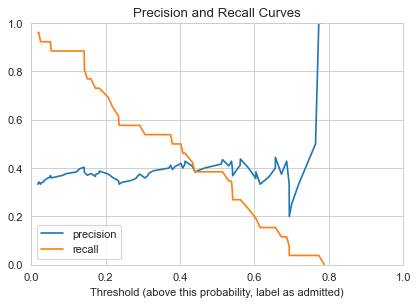

In [65]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, gnb.predict_proba(X_test_scaled)[:,1])

plt.figure(dpi=80)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as admitted)');
plt.title('Precision and Recall Curves');

In [66]:
y_predict = (gnb.predict_proba(X_test_scaled)[:,1] >= 0.37)

print('Accuracy Score for GaussianNB: {}'.format(accuracy_score(y_test, y_predict)))
print('Precision Score for GaussianNB: {}'.format(precision_score(y_test, y_predict)))
print('Recall Score for GaussianNB: {}'.format(recall_score(y_test, y_predict)))
print('ROC AUC Score for GaussianNB: {}\n'.format(roc_auc_score(y_test, y_predict)))

print('Classification report for GaussianNB:\n {}'.format(classification_report(y_test, y_predict)))
print('Confusion Matrix for GaussianNB:\n {}'.format(confusion_matrix(y_test, y_predict)))

Accuracy Score for GaussianNB: 0.5875
Precision Score for GaussianNB: 0.4
Recall Score for GaussianNB: 0.5384615384615384
ROC AUC Score for GaussianNB: 0.5747863247863247

Classification report for GaussianNB:
               precision    recall  f1-score   support

           0       0.73      0.61      0.67        54
           1       0.40      0.54      0.46        26

    accuracy                           0.59        80
   macro avg       0.57      0.57      0.56        80
weighted avg       0.62      0.59      0.60        80

Confusion Matrix for GaussianNB:
 [[33 21]
 [12 14]]


### Threshold tuning for GaussianNB model

In [84]:
def model_threshold_tuning(model, X, y, model_name):
    
    # Splitting the data into 80% training data and 20% testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                  # eg [ 0.0001 , 0.1008, 0.2006, 0.3004, 0.4002, 0.5, 0.5998, 0.6996, 0.7994, 0.8992, 0.9999 ]
                 np.linspace(optimal_th-0.1, optimal_th+0.1, 21), 
                  # eg 0.3xx [ 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ]
                 np.linspace(optimal_th-0.01, optimal_th+0.01, 21)]
                  # eg 0.30x [ 0.29 , 0.291, 0.292, 0.293, 0.294, 0.295, 0.296, 0.297, 0.298, 0.299, 0.3  , 0.301, 0.302, 0.303, 0.304, 0.305, 0.306, 0.307, 0.308, 0.309, 0.31 ]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            precision = precision_score(y_test, y_pred)
            score_list.append(precision)
            print('{:.3f}->{:.4f}'.format(th, precision), end=',  ')   # display score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])
        
    print('\n')
    print('optimal precision score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))
    
    # Confusion Matrix at th = 0.23
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.23)
    print('\nAdjust threshold to 0.23:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    # Confusion Matrix at th = 0.25
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    
    # Confusion Matrix at th = 0.35
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.35)
    print('\nAdjust threshold to 0.35:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    # Confusion Matrix at th = 0.36
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.36)
    print('\nAdjust threshold to 0.36:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    # Confusion Matrix at th = 0.37
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.37)
    print('\nDefault threshold of 0.37:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    # Confusion Matrix at th = 0.38
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.38)
    print('\nDefault threshold of 0.38:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    # Confusion Matrix at th = 0.39
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.39)
    print('\nDefault threshold of 0.39:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    
    # Confusion Matrix at th = 0.5
    y_pred = (model.predict_proba(X_test)[:,1] >= 0.50) 
    print('\nAdjust threshold to 0.5:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

    
    # Confusion Matrix at optimal th
    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(model_name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))

In [85]:
# Separate data into X and Y components
X = data_with_dummy.iloc[:, 1:]
y = data_with_dummy.iloc[:, 0]

## Scale data 
std = StandardScaler()
std.fit(X.values)

## Scale the Predictors
X = std.transform(X.values)

print('\n"""""" GaussianNB """"""')
gnb = GaussianNB()
model_threshold_ranges = model_threshold_tuning(gnb, X, y, 'GaussianNB')


"""""" GaussianNB """"""

Looping decimal place 1
0.000->0.3250,  0.100->0.3770,  0.200->0.3878,  0.300->0.3750,  0.400->0.4062,  0.500->0.4000,  0.600->0.4000,  0.700->0.2000,  0.800->0.0000,  0.900->0.0000,  1.000->0.0000,  
Looping decimal place 2
0.300->0.3750,  0.310->0.3590,  0.320->0.3784,  0.330->0.3889,  0.340->0.3889,  0.350->0.3889,  0.360->0.3889,  0.370->0.4000,  0.380->0.3939,  0.390->0.4062,  0.400->0.4062,  0.410->0.4000,  0.420->0.4286,  0.430->0.4286,  0.440->0.4074,  0.450->0.3846,  0.460->0.3846,  0.470->0.4000,  0.480->0.4000,  0.490->0.4000,  0.500->0.4000,  
Looping decimal place 3
0.410->0.4000,  0.411->0.4000,  0.412->0.4000,  0.413->0.4138,  0.414->0.4286,  0.415->0.4286,  0.416->0.4286,  0.417->0.4286,  0.418->0.4286,  0.419->0.4286,  0.420->0.4286,  0.421->0.4286,  0.422->0.4286,  0.423->0.4286,  0.424->0.4286,  0.425->0.4286,  0.426->0.4286,  0.427->0.4286,  0.428->0.4286,  0.429->0.4286,  0.430->0.4286,  

optimal precision score = 0.4286
optimal threshol

In [69]:
def make_confusion_matrix(model, X, y, threshold):
    
    # Splitting the data into 80% training data and 20% testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
    
    model.fit(X_train, y_train)
    
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)  # This line is important
    # Converts your probabilities into True and False
    # model.predict_proba(X_test) print this one out first
    # model.predict_proba(X_test)[:, 1] then this one
    # model.predict_proba(X_test)[:, 1] >= threshold then this one
    
    admission_confusion = confusion_matrix(y_test, y_predict)
    fig, ax = plt.subplots(dpi=80)    
    g = sns.heatmap(admission_confusion, cmap=plt.cm.Reds, annot=True, annot_kws={"size":20}, square=True, fmt='d',
                    xticklabels=['No admit', 'Admit'],
                    yticklabels=['No admit', 'Admit']);

    # Changing the size of the xticks and ytick labels
    ax.set_yticklabels(g.get_yticklabels(), size=10);
    ax.set_xticklabels(g.get_xticklabels(), size=10);
        
    # Changing axis orientation & setting titles
    ax.set_xlabel('Prediction', size=15)
    ax.set_ylabel('Actual', rotation=0, labelpad=40,size=15)
        
    # Prevent Heatmap Cut-Off Issue
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

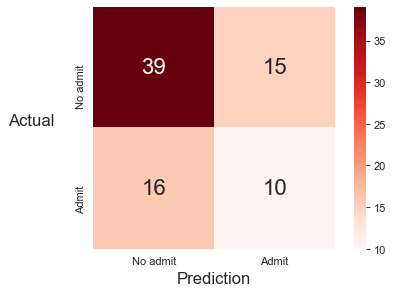

In [70]:
make_confusion_matrix(gnb, X, y, 0.5)

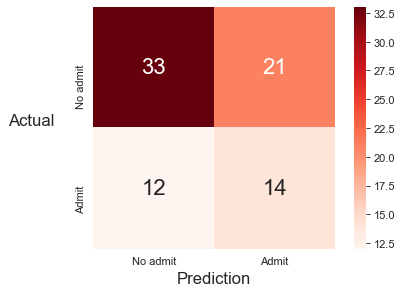

In [71]:
make_confusion_matrix(gnb, X, y, 0.37)